# Keras demo with Fashion MNIST

In [1]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

import keras
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import fashion_mnist, cifar10

Using TensorFlow backend.


## Load and preprocess dataset

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


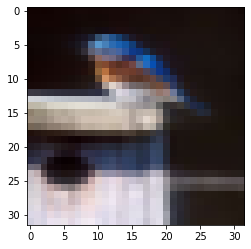

In [2]:
index_view = 13

num_classes = 10
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

imgshow = x_train[index_view]
plt.imshow(imgshow,cmap='gray', vmin=0, vmax=1)

## CNN Model

In [3]:
def CNN():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(500, activation='relu')) # dipakai setelah flatten()
  model.add(Dropout(0.5))
  model.add(Dense(500, activation='relu')) # dipakai setelah flatten()
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  
  return model

In [4]:
model = CNN()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        102464    
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)              

## Train

In [5]:
model.fit(x_train,
          y_train,
          epochs=15,
          batch_size=128,
          verbose=1,
          validation_split=0.1
         )

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 10s 222us/step - loss: 1.7251 - accuracy: 0.3588 - val_loss: 1.3512 - val_accuracy: 0.5036
Epoch 2/15
45000/45000 [==============================] - 9s 192us/step - loss: 1.3305 - accuracy: 0.5181 - val_loss: 1.1891 - val_accuracy: 0.5714
Epoch 3/15
45000/45000 [==============================] - 9s 192us/step - loss: 1.1590 - accuracy: 0.5875 - val_loss: 1.0061 - val_accuracy: 0.6356
Epoch 4/15
45000/45000 [==============================] - 9s 192us/step - loss: 1.0356 - accuracy: 0.6349 - val_loss: 0.9004 - val_accuracy: 0.6904
Epoch 5/15
45000/45000 [==============================] - 9s 193us/step - loss: 0.9394 - accuracy: 0.6710 - val_loss: 0.8176 - val_accuracy: 0.7150
Epoch 6/15
45000/45000 [==============================] - 9s 194us/step - loss: 0.8767 - accuracy: 0.6917 - val_loss: 0.7873 - val_accuracy: 0.7302
Epoch 7/15
45000/45000 [==============================] - 9s 1

## Test

In [6]:
score, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss : {score}")
print(f"Test acc. : {acc}")

Test loss : 0.7276661033630372
Test acc. : 0.7505000233650208


## Predict

Pred : [[8.2559849e-04 1.0203053e-05 3.6174659e-02 5.9851487e-03 9.0322399e-01
  1.4903182e-02 8.1792701e-04 3.7906423e-02 1.0606750e-04 4.6750793e-05]]
Pred : 4


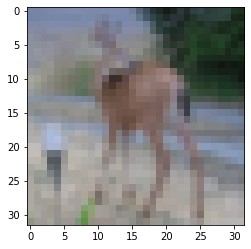

In [7]:
index_test = 100
pred = model.predict(np.array([x_test[index_test]]))
print(f"Pred : {pred}")
print(f"Pred : {np.argmax(pred)}")
plt.imshow(np.reshape(x_test[index_test], (32, 32, 3)))